In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.special import gamma as gamma_function
import scipy.stats as st
from sklearn.mixture import GaussianMixture
import pandas as pd
from face import FACE 
from rslvq import RSLVQ

In [2]:
from sklearn.datasets import load_iris
S, P = load_iris(return_X_y= True)

In [3]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_val, y_train, y_val = train_test_split(S, P, test_size=0.3, random_state=42)

In [4]:
classif = RSLVQ(1)
classif.fit(x_train, y_train)

Training: 100%|██████████| 100/100 [00:01<00:00, 79.28epoch/s]


(array([[ 5.07506378,  4.80580924, -0.8724311 , -0.83957243],
        [ 8.35681068,  3.46959441,  2.95611108, -1.9966927 ],
        [ 6.55618065,  1.00196451,  8.50688447,  3.69286179]]),
 array([0, 1, 2]))

In [5]:
classif.evaluate(x_val, y_val)

100.0

In [6]:
explainer = FACE(3.5, 0.1,classif, 3,classification_threshold=0.31,  density_estimator='KDE', kde_bandwidth=0.2 )

In [7]:
explainer.fit(S, P)
# c = explainer.create_path_to_counterfactual_class(S[0], 2)


In [8]:
c,I,p = explainer.generate_counterfactual(S[-2],1)

In [9]:
explainer.recourse_paths()

[array([[6.2, 3.4, 5.4, 2.3],
        [6.4, 3.2, 5.3, 2.3],
        [6.5, 3.2, 5.1, 2. ],
        [6.7, 3. , 5. , 1.7],
        [6.7, 3.1, 4.7, 1.5],
        [6.9, 3.1, 4.9, 1.5]]),
 array([[6.2, 3.4, 5.4, 2.3],
        [6.4, 3.2, 5.3, 2.3],
        [6.5, 3.2, 5.1, 2. ],
        [6.7, 3. , 5. , 1.7],
        [6.7, 3.1, 4.7, 1.5],
        [6.6, 2.9, 4.6, 1.3]])]

In [10]:
a = explainer._kernel_function(S, 'KDE', S[0], S[1])

In [11]:
a > 0


array([ True])

In [12]:
a

array([0.1202185])

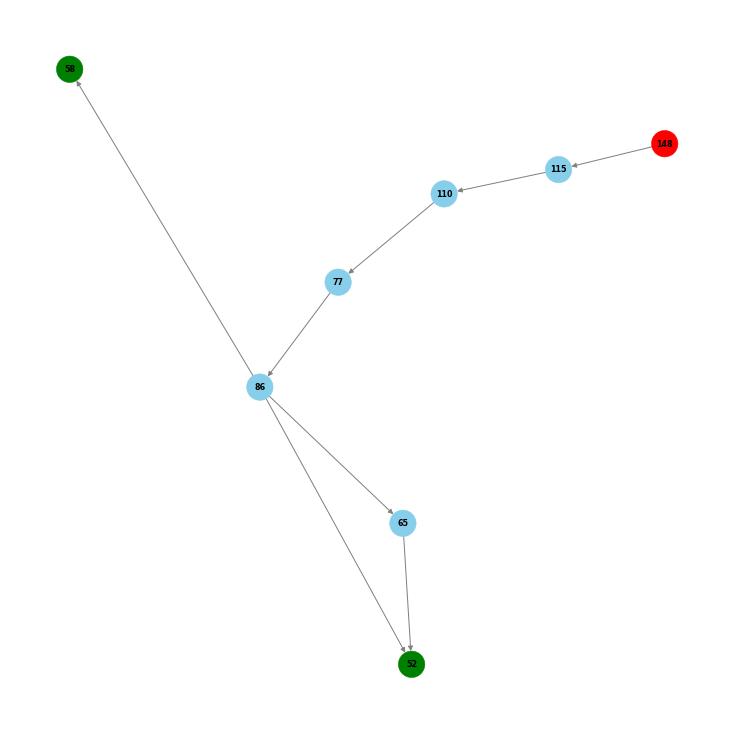

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Define edges of the graph
edges = [(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (5, 2)]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(p.edges())

# Identify sources and sinks
sources = [node for node, in_degree in G.in_degree() if in_degree == 0]
sinks = [node for node, out_degree in G.out_degree() if out_degree == 0]

# Set node colors
node_colors = ['red' if node in sources else 'green' if node in sinks else 'skyblue' for node in G.nodes]

plt.figure(figsize=(10, 10))
# Plot the graph with different node colors
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, font_color='black', font_size=8, edge_color='gray', linewidths=0.5)

# Show the plot
plt.show()


In [14]:
p.edges()

OutEdgeView([(148, 115), (115, 110), (110, 77), (77, 86), (86, 52), (86, 65), (86, 58), (65, 52)])

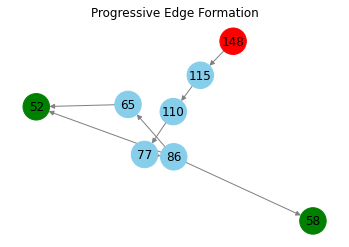

In [15]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
from IPython.display import HTML
import random

# Function to update the plot for each animation frame
def update(frame):
    plt.cla()  # Clear the current axis

    # Add edges progressively
    edges_to_add = edges[:frame + 1]
    G.add_edges_from(edges_to_add)
    # Identify sources and sinks
    sources = [node for node, in_degree in G.in_degree() if in_degree == 0]
    sinks = [node for node, out_degree in G.out_degree() if out_degree == 0]

    # Set node colors
    node_colors = ['red' if node in sources else 'green' if node in sinks else 'skyblue' for node in G.nodes]

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color='gray')

    plt.title('Progressive Edge Formation')

# Create a graph with nodes

G = nx.DiGraph()
G.add_nodes_from(p.nodes())

# Create a list of edges
edges = list(p.edges())
# Create a figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, update, frames=len(p.edges()), interval=1000, repeat=False)
animation.save('progressive_edge_formation_2.gif', writer='pillow', fps=1)
# Display the animation in the notebook
HTML(animation.to_jshtml())


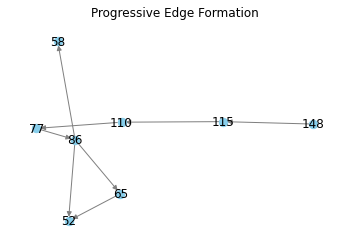

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
from IPython.display import HTML
import random

# Function to update the plot for each animation frame
def update(frame):
    plt.cla()  # Clear the current axis

    # Add edges progressively
    edges_to_add = edges[:frame + 1]
    G.add_edges_from(edges_to_add)

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=70, edge_color='gray')

    plt.title('Progressive Edge Formation')

# Create a graph with nodes
G = nx.DiGraph()
G.add_nodes_from(p.nodes())

# Create a list of edges
edges = list(p.edges())

# Create a figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, update, frames=len(p.edges()), interval=1000, repeat=False)

# Save the animation to a file (change the filename and format as needed)
animation.save('progressive_edge_formation_1.gif', writer='pillow', fps=1)

# Display the animation in the notebook
HTML(animation.to_jshtml())


In [17]:
p.edges()

OutEdgeView([(148, 115), (115, 110), (110, 77), (77, 86), (86, 52), (86, 65), (86, 58), (65, 52)])